In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
%load_ext version_information
%version_information numpy, dlib, matplotlib, imageio, gaze, torch, torchvision

Software,Version
Python,3.6.9 64bit [GCC 8.4.0]
IPython,7.8.0
OS,Linux 4.15.0 118 generic x86_64 with Ubuntu 18.04 bionic
numpy,1.17.2
dlib,19.19.0
matplotlib,3.1.1
imageio,2.6.1
gaze,The 'gaze' distribution was not found and is required by the application
torch,1.5.1
torchvision,0.6.1


# training the model on the cropped faces

In [4]:
from gaze import init

In [5]:
dataset_valid='../dataset_valid'
dataset_new='../dataset_valid' #'../dataset_new'

In [6]:
date = '20200907'
epochs = 400
args = init(verbose=1, epochs=epochs, fullsize=10,
            conv1_dim=5, conv1_kernel_size=4, conv2_dim=15, conv2_kernel_size=5,
            dataset_faces_folder='dataset_train_%s'%date, #None, #'dataset_faces_%s'%date,
            dataset_train='dataset_train_%s'%date, dataset_test='dataset_train_%s'%date,
            #dataset_train='dataset_train_%s'%date, dataset_test='dataset_test_%s'%date,
            dataset_folder=dataset_valid)

path = 'Regard_400_%s.pt'%('20200930')#date

In [7]:
print('Parameters=', args)
!ls -l {path}

Parameters= Namespace(N_cv=20, activation='relu', batch_size=16, conv1_bn_momentum=0.5, conv1_dim=5, conv1_kernel_size=4, conv2_bn_momentum=0.5, conv2_dim=15, conv2_kernel_size=5, crop=75, dataset_faces_folder='dataset_train_20200907', dataset_folder='../dataset_valid', dataset_test='dataset_train_20200907', dataset_train='dataset_train_20200907', dense_bn_momentum=0.5, dimension=30, do_adam=False, epochs=400, fullsize=10, log_interval=0, lr=0.01, mean=0.4, momentum=0.05, no_cuda=False, num_processes=1, seed=42, size=40, size_test_set=0.2, std=0.3, stride1=2, stride2=4, test_batch_size=16, verbose=1)
ls: cannot access 'Regard_400_20200930.pt': No such file or directory


In [8]:
from gaze import ML
ml = ML(args)
ml.train(path=path)

Found 4380 sample images;  3504  to train 876 to test
Training model...
Train Epoch
Model saved at Regard_400_20200930.pt


## testing the model

In [9]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))

Accuracy=90.8%


## showing the images which are wrongly classified

In [10]:
import time
import os
import glob
import imageio
from LeCheapEyeTracker_copy.EyeTrackerServer import FaceExtractor
#from gaze import FaceExtractor #/!\ ImportError
FE = FaceExtractor()
timings = []
wrongs = []
good = []
for target in ml.dataset.classes:
    print(target, args.dataset_folder)
    
    #for dataset in [dataset_valid, dataset_new] :
    dataset = dataset_new
    for filename in glob.glob(os.path.join(dataset, target, '*.png')):

        if False:
            frame = imageio.imread(filename)
            img_face = FE.face_extractor(frame)
        else:
            filename_face = filename.replace(dataset, args.dataset_test)
            if os.path.exists(filename_face) : img_face = imageio.imread(filename_face)

        if os.path.exists(filename_face) :
            pred = ml.classify(img_face, ml.dataset.test_transform)
            pred_label = ml.dataset.classes[pred.argmax()]

            if not pred_label == target:
                wrong = dict(filename_face=filename_face, pred_label=pred_label, target=target)
                wrongs.append(wrong)
                print('For ', filename, ', Pred=', pred_label, ' True=', target, ', P=', [round(p, 3) for p in pred], sep='')
                #plt.imshow(img_face)
                #plt.show()
            else:
                good.append(dict(filename_face=filename_face, pred_label=pred_label, target=target))

blink ../dataset_valid
For ../dataset_valid/blink/2020-07-15_Phiphi__084.png, Pred=left True=blink, P=[0.028, 0.0, 0.788, 0.184]
For ../dataset_valid/blink/2020-07-15_Iason__032.png, Pred=center True=blink, P=[0.0, 0.999, 0.0, 0.001]
For ../dataset_valid/blink/2020-07-15_Ektor__078.png, Pred=right True=blink, P=[0.0, 0.0, 0.0, 1.0]
For ../dataset_valid/blink/2020-07-15_Iason__069.png, Pred=center True=blink, P=[0.0, 0.999, 0.0, 0.001]
For ../dataset_valid/blink/2020-07-10_Laurent42__106.png, Pred=left True=blink, P=[0.0, 0.0, 1.0, 0.0]
center ../dataset_valid
For ../dataset_valid/center/2018-10-24_Laurent_238.png, Pred=left True=center, P=[0.0, 0.035, 0.965, 0.0]
For ../dataset_valid/center/2020-07-15_Ektor__025.png, Pred=blink True=center, P=[0.616, 0.384, 0.0, 0.0]
For ../dataset_valid/center/2020-07-21_Juliette__036.png, Pred=right True=center, P=[0.0, 0.172, 0.0, 0.828]
For ../dataset_valid/center/2019-05-16_Laurent_035.png, Pred=right True=center, P=[0.0, 0.079, 0.002, 0.918]
For 

For ../dataset_valid/left/2020-07-15_Phiphi__030.png, Pred=right True=left, P=[0.0, 0.241, 0.0, 0.759]
For ../dataset_valid/left/2019-05-16_Laurent_207.png, Pred=center True=left, P=[0.0, 0.634, 0.366, 0.0]
For ../dataset_valid/left/2018-10-03_Laurent_155.png, Pred=center True=left, P=[0.0, 0.615, 0.385, 0.0]
For ../dataset_valid/left/2018-10-14_Laurent_045.png, Pred=center True=left, P=[0.0, 0.687, 0.313, 0.0]
For ../dataset_valid/left/2020-07-10_Laurent42__034.png, Pred=blink True=left, P=[0.999, 0.0, 0.001, 0.0]
For ../dataset_valid/left/2020-07-10_Laurent43__080.png, Pred=blink True=left, P=[0.668, 0.0, 0.331, 0.001]
For ../dataset_valid/left/2020-07-15_Oscar__080.png, Pred=center True=left, P=[0.001, 0.665, 0.334, 0.0]
For ../dataset_valid/left/2018-10-24_Laurent_152.png, Pred=center True=left, P=[0.0, 0.987, 0.013, 0.0]
For ../dataset_valid/left/2018-10-24_Laurent_182.png, Pred=center True=left, P=[0.0, 0.984, 0.016, 0.0]
For ../dataset_valid/left/2018-10-14_Laurent_155.png, Pred

For ../dataset_valid/right/2020-07-21_Juliette__106.png, Pred=center True=right, P=[0.0, 0.999, 0.0, 0.001]
For ../dataset_valid/right/2020-07-15_Phiphi__065.png, Pred=center True=right, P=[0.0, 0.78, 0.0, 0.22]
For ../dataset_valid/right/2020-07-21_Juliette__054.png, Pred=center True=right, P=[0.0, 0.696, 0.0, 0.304]
For ../dataset_valid/right/2020-07-15_Phiphi__033.png, Pred=center True=right, P=[0.002, 0.565, 0.0, 0.433]
For ../dataset_valid/right/2019-05-16_Laurent_157.png, Pred=center True=right, P=[0.0, 0.887, 0.0, 0.113]
For ../dataset_valid/right/2020-07-15_Ektor__014.png, Pred=center True=right, P=[0.0, 1.0, 0.0, 0.0]
For ../dataset_valid/right/2020-07-10_JeanNicolas__087.png, Pred=center True=right, P=[0.0, 0.991, 0.0, 0.009]
For ../dataset_valid/right/2020-07-15_Phiphi__110.png, Pred=center True=right, P=[0.0, 1.0, 0.0, 0.0]
For ../dataset_valid/right/2020-07-15_Hadi__098.png, Pred=center True=right, P=[0.0, 0.929, 0.0, 0.071]
For ../dataset_valid/right/2019-05-16_Laurent_24

In [11]:
len(wrongs)

182

In [12]:
len(good)

4196

In [13]:
liste_file = dict(wrongs=wrongs, good=good)

In [14]:
args

Namespace(N_cv=20, activation='relu', batch_size=16, classes=['blink', 'center', 'left', 'right'], conv1_bn_momentum=0.5, conv1_dim=5, conv1_kernel_size=4, conv2_bn_momentum=0.5, conv2_dim=15, conv2_kernel_size=5, crop=75, dataset_faces_folder='dataset_train_20200907', dataset_folder='../dataset_valid', dataset_test='dataset_train_20200907', dataset_train='dataset_train_20200907', dense_bn_momentum=0.5, dimension=30, do_adam=False, epochs=400, fullsize=10, log_interval=0, lr=0.01, mean=0.4, momentum=0.05, no_cuda=False, num_processes=1, seed=42, size=40, size_test_set=0.2, std=0.3, stride1=2, stride2=4, test_batch_size=16, verbose=1)

## skim through images which were wrongly classified

Some images were obviously misclassified at the supervision level, let's try to fix that.

In [15]:
import os
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
import pickle
import imageio
import shutil

In [16]:
with open('list_change.pkl', 'rb') as fichier :
    list_change = pickle.load(fichier, encoding='latin1')

In [17]:
def view_image(filename, pred_label, target) :
    
    img_face = imageio.imread(filename)
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    ax.imshow(img_face)
    ax.set_title('Pred: %s / True: %s'%(pred_label, target))

def change(liste_file, l, i, filename, filename_old, filename_face, target, new_target) :
    
    filename_new = filename.replace(target, new_target)
    filename_face_new = filename_face.replace(target, new_target)
    filename_face_new = filename_face_new.replace(args.dataset_test, args.dataset_train)

    print('Changing...', filename_old, ' to ', filename_new)
    shutil.move(filename_old, filename_new)
    print('Changing...', filename_face, ' to ', filename_face_new)
    shutil.move(filename_face, filename_face_new)
    
    liste_file[l][i]['filename_face'] = filename_face_new
    liste_file[l][i]['target'] = new_target
    
    list_change.append([filename, filename_new])

In [18]:
args

Namespace(N_cv=20, activation='relu', batch_size=16, classes=['blink', 'center', 'left', 'right'], conv1_bn_momentum=0.5, conv1_dim=5, conv1_kernel_size=4, conv2_bn_momentum=0.5, conv2_dim=15, conv2_kernel_size=5, crop=75, dataset_faces_folder='dataset_train_20200907', dataset_folder='../dataset_valid', dataset_test='dataset_train_20200907', dataset_train='dataset_train_20200907', dense_bn_momentum=0.5, dimension=30, do_adam=False, epochs=400, fullsize=10, log_interval=0, lr=0.01, mean=0.4, momentum=0.05, no_cuda=False, num_processes=1, seed=42, size=40, size_test_set=0.2, std=0.3, stride1=2, stride2=4, test_batch_size=16, verbose=1)

In [19]:
def f(i, l, action):
    liste = liste_file[l][i]
    
    filename_face = liste['filename_face']
    #filename = filename_face.replace(args.dataset_faces_folder, args.dataset_folder)
    filename = filename_face.replace(args.dataset_test, args.dataset_folder)
    
    
    
    if os.path.exists(filename) : filename_old = filename
    #else :                        filename_old = filename_face.replace(args.dataset_faces_folder, dataset_new)
    else :                        filename_old = filename_face.replace(args.dataset_test, dataset_new)
    
    print(filename_old)
    
    pred_label, target = liste['pred_label'], liste['target']
    view_image(filename_old, pred_label, target)
    
    if   action == 'center' : change(liste_file, l, i, filename, filename_old, filename_face, target, 'center')
    elif action == 'right'  : change(liste_file, l, i, filename, filename_old, filename_face, target, 'right')
    elif action == 'left'   : change(liste_file, l, i, filename, filename_old, filename_face, target, 'left')
    elif action == 'blink'  : change(liste_file, l, i, filename, filename_old, filename_face, target, 'blink')
    elif action == 'Valide' : change(liste_file, l, i, filename, filename_old, filename_face, target, target)

    return action

In [20]:
list_target = ['center', 'right', 'left', 'blink']

a = widgets.FloatText()
b = widgets.IntSlider(min=0, max=len(wrongs)-1, step=1, value=0, readout=True)

mylink = widgets.jslink((a, 'value'), (b, 'value'))
l =['wrongs', 'good']


w = interactive(f, i=b, l=l, action=widgets.ToggleButtons(options=['Keep', 'Valide']+list_target))

display(a, w)

FloatText(value=0.0)

interactive(children=(IntSlider(value=0, description='i', max=181), Dropdown(description='l', options=('wrongs…

In [21]:
len(list_change)

728

In [22]:
with open('list_change.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(list_change)

In [23]:
nb = 0
for x in range(len(list_change)) :
    for y in range(x+1, len(list_change)) :
        if list_change[x][0]==list_change[y][1] and list_change[x][1]==list_change[y][0] :
            print(x, list_change[x], '\n', y, list_change[y], '\n')
            list_change[x][1] = list_change[y][1]
            list_change[y][0] = list_change[x][0]
            print(x, list_change[x], '\n', y, list_change[y], '\n\n')
            nb+=2
print(nb)

0


In [24]:
x, nb = 0, 0
while x < len(list_change) :
    if list_change[x][0]==list_change[x][1] :
        nb+=1
        print(nb, list_change[x])
        list_change.pop(x)
        x-=1
    x+=1     

In [25]:
print(len(list_change))

728


In [26]:
with open('list_change.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(list_change)

## showing the trained weights

https://github.com/utkuozbulak/pytorch-cnn-visualizations/blob/master/README.md


In [27]:
child = ml.model.children()

convolayer = [i for i in ml.model.children()][1]
convolayer

weights = convolayer.weight.data.clone()
weights.shape

torch.Size([5])

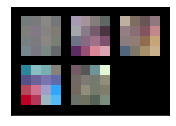

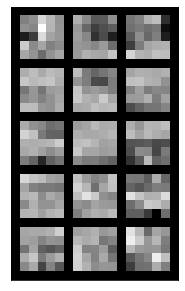

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torchvision import utils

def plotkernel(tensor, figname, ch=0, allkernels=False, nrow=3, padding=1):
    n, c, w, h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    fig, ax = plt.subplots( figsize=(nrow,rows))
    ax.imshow(grid.cpu().numpy().transpose((1, 2, 0)))
    plt.setp(ax, xticks=[], yticks=[])

    plt.savefig(figname)

for i, weights in enumerate([ml.model.conv1.weight.data.clone(), ml.model.conv2.weight.data.clone()]):
    plotkernel(weights, figname = 'figures/kernel_layer' + str(i) + '.png')

    